In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA, FastICA
from sklearn.manifold import TSNE
import umap
import pacmap
from sklearn.cluster import KMeans, DBSCAN, MeanShift, Birch


In [2]:
#Load Data
df = pd.read_excel('C:\\Users\kterri3\Documents\Git Repositories\hw\CHE4230HW\che4230_hw\Project Stuff\RawData.xlsx')
#print(df)

In [3]:
scaler = StandardScaler().fit(df)
df_scaled = scaler.transform(df)
#df_scaled

PCA with Clustering

Text(0.5, 1.0, 'Principal Component Analysis')

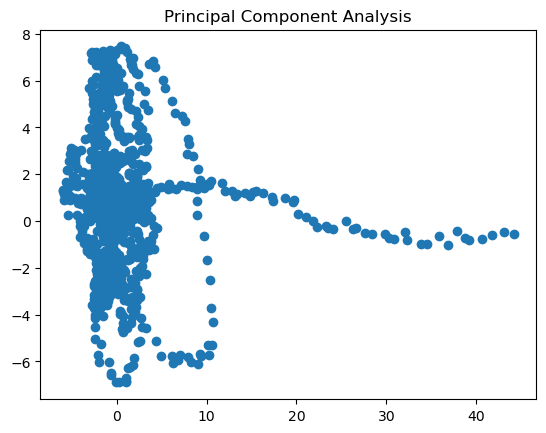

In [4]:
pca = PCA(n_components=4)
df_pca = pca.fit_transform(df_scaled)

plt.scatter(df_pca[:,0], df_pca[:,1])
plt.title("Principal Component Analysis")

[0 0 0 ... 1 1 1]


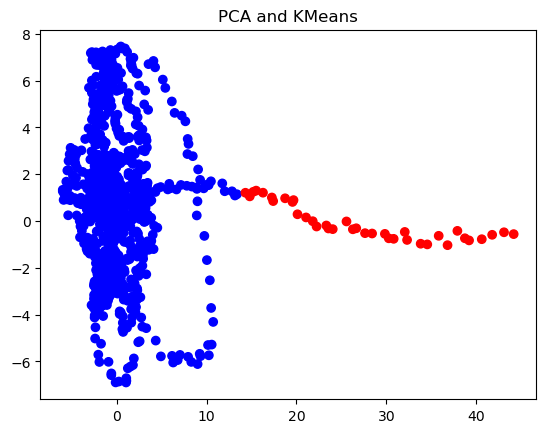

In [5]:
#PCA and KMEANS
pca_kmean_model = KMeans(n_clusters = 2)
pca_kmean_model.fit(df_pca)
pca_kmean_labels = pca_kmean_model.labels_
centroids = pca_kmean_model.cluster_centers_
print(pca_kmean_labels)
    # colors for plotting
colors = ['blue', 'red', 'green', 'orange', 'black', 'brown','teal','silver', 'yellow','purple','pink']
    # assign a color to each features (note that we are using features as target)
features_colors = [ colors[pca_kmean_labels[i]] for i in range(len(df_pca)) ]
plt.scatter(df_pca[:,0], df_pca[:,1],c=features_colors,marker='o')
plt.title("PCA and KMeans")
plt.show()

Text(0.5, 1.0, 'PCA and DBSCAN')

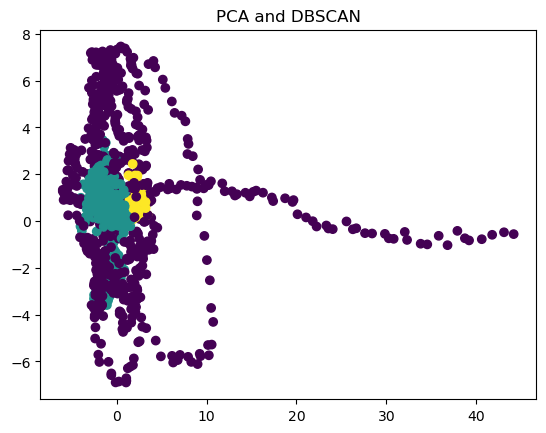

In [6]:
#PCA and DBSCAN
pca_dbscan_model = DBSCAN(eps = 1, min_samples = 15)
pca_dbscan_model.fit(df_pca)
pca_dbscan_labels = pca_dbscan_model.labels_
plt.scatter(df_pca[:, 0], df_pca[:, 1], c = pca_dbscan_labels)
plt.title("PCA and DBSCAN")

Text(0.5, 1.0, 'PCA and Birch')

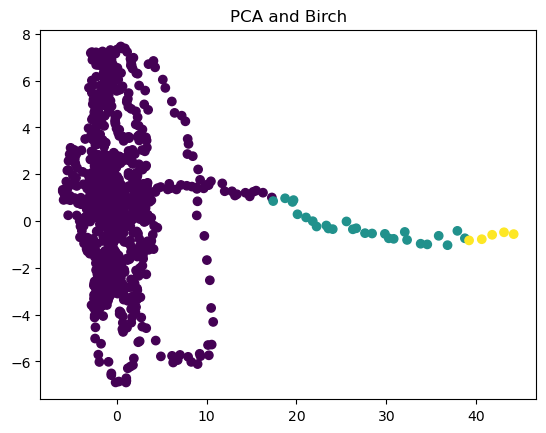

In [7]:
#PCA and Birch
pca_birch_model = Birch(branching_factor = 50, n_clusters = None, threshold = 5)
pca_birch_model.fit(df_pca)
pca_birch_labels = pca_birch_model.labels_
pca_birch_pred = pca_birch_model.predict(df_pca)
plt.scatter(df_pca[:, 0], df_pca[:, 1], c = pca_birch_pred)
plt.title("PCA and Birch")

tSNE with Clustering

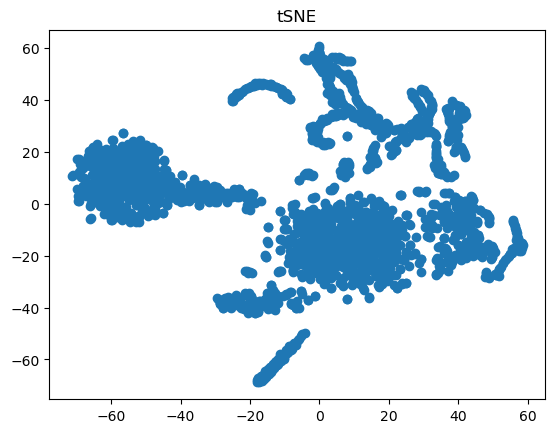

In [8]:
#using tSNE
tsne = TSNE(n_components = 2,learning_rate = 750, init = 'random')
df_tsne = tsne.fit_transform(df_scaled)

plt.scatter(df_tsne[:,0], df_tsne[:,1])
plt.title("tSNE")
plt.show()

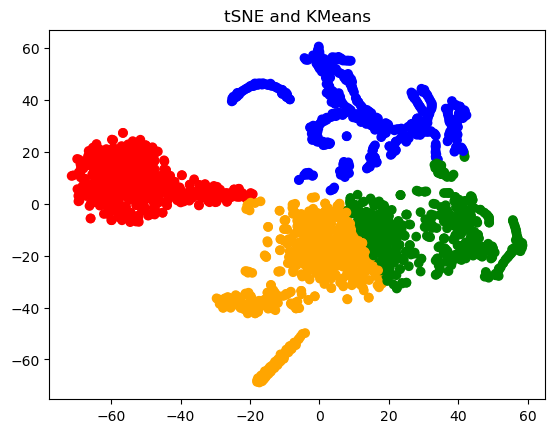

In [9]:
#tSNE and KMEANS
tsne_kmean_model = KMeans(n_clusters = 4)
tsne_kmean_model.fit(df_tsne)
tsne_kmean_labels = tsne_kmean_model.labels_
centroids = tsne_kmean_model.cluster_centers_
    #print(tsne_kmean_labels)
    # colors for plotting
colors = ['blue', 'red', 'green', 'orange', 'black', 'brown','teal','silver', 'yellow','purple','pink']
    # assign a color to each features (note that we are using features as target)
features_colors = [ colors[tsne_kmean_labels[i]] for i in range(len(df_tsne)) ]
plt.scatter(df_tsne[:,0], df_tsne[:,1],c=features_colors,marker='o')
plt.title("tSNE and KMeans")
plt.show()

c:\Users\kterri3\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


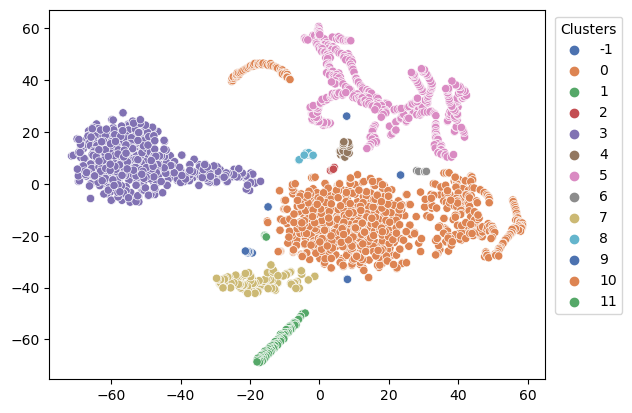

In [10]:
#tSNE and DBScan
tsne_dbscan_model = DBSCAN(eps = 4.54, min_samples = 4).fit(df_tsne)
tsne_dbscan_labels = tsne_dbscan_model.labels_
set(tsne_dbscan_model.labels_)
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, -1}
import seaborn as sns
import matplotlib.pyplot as plt

tsne_p = sns.scatterplot(df_tsne[:,0], df_tsne[:,1], hue = tsne_dbscan_model.labels_, legend = "full", palette = "deep")
sns.move_legend(tsne_p, "upper right", bbox_to_anchor = (1.17, 1.), title = 'Clusters')
plt.show()

Text(0.5, 1.0, 'tSNE and Birch')

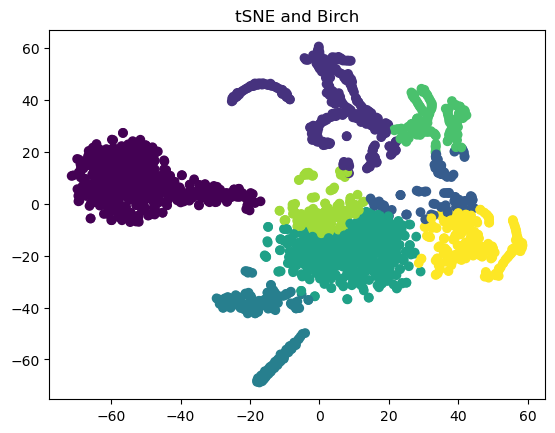

In [11]:
#tSNE and Birch
tsne_birch_model = Birch(branching_factor = 50, n_clusters = 8, threshold = 10)
tsne_birch_model.fit(df_tsne)
tsne_birch_labels = tsne_birch_model.labels_
tsne_birch_pred = tsne_birch_model.predict(df_tsne)
plt.scatter(df_tsne[:, 0], df_tsne[:, 1], c = tsne_birch_pred)
plt.title("tSNE and Birch")

ICA and Clustering 

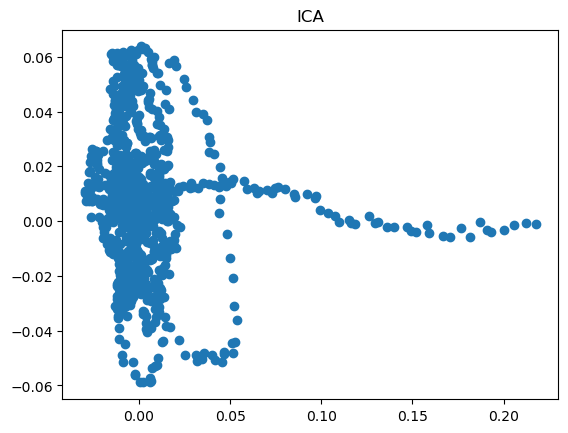

In [12]:
ica = FastICA(n_components = 2)
df_ica = ica.fit_transform(df_scaled)
plt.scatter(df_ica[:,0], df_ica[:,1])
plt.title("ICA")
plt.show()

[0 0 0 ... 1 1 1]


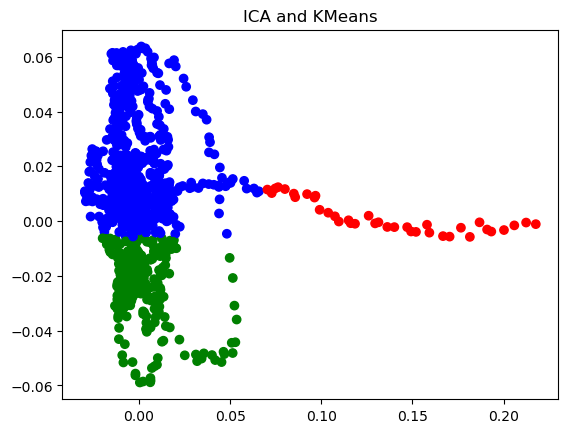

In [13]:
#ICA and KMEANS
ica_kmean_model = KMeans(n_clusters = 3)
ica_kmean_model.fit(df_ica)
ica_kmean_labels = ica_kmean_model.labels_
centroids = ica_kmean_model.cluster_centers_
print(ica_kmean_labels)

# colors for plotting
ica_kmeans_colors = ['blue', 'red', 'green', 'orange', 'black', 'brown','teal','silver', 'yellow','purple','pink']
# assign a color to each features (note that we are using features as target)
ica_kmeans_features_colors = [ ica_kmeans_colors[ica_kmean_labels[i]] for i in range(len(df_ica)) ]

plt.scatter(df_ica[:,0], df_ica[:,1],c=ica_kmeans_features_colors,marker='o')
plt.title("ICA and KMeans")
plt.show()

c:\Users\kterri3\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


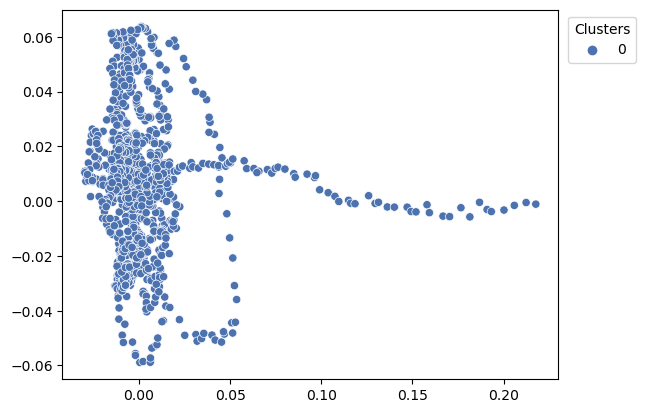

In [14]:
#ICA and DBScan
ica_dbscan_model = DBSCAN().fit(df_ica)
ica_dbscan_labels = ica_dbscan_model.labels_
set(ica_dbscan_model.labels_)
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, -1}
import seaborn as sns
import matplotlib.pyplot as plt

ica_p = sns.scatterplot(df_ica[:,0], df_ica[:,1], hue = ica_dbscan_model.labels_, legend = "full", palette = "deep")
sns.move_legend(ica_p, "upper right", bbox_to_anchor = (1.17, 1.), title = 'Clusters')
plt.show()

Text(0.5, 1.0, 'ICA and Birch')

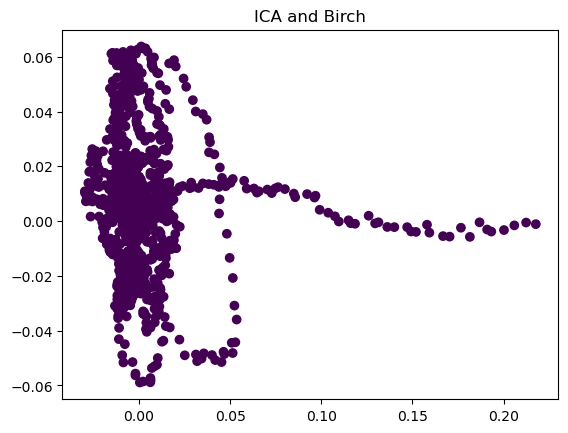

In [15]:
#ICA and Birch
ica_birch_model = Birch(branching_factor = 50, n_clusters = 2, threshold = 0.0005)
ica_birch_model.fit(df_ica)
tsne_birch_labels = ica_birch_model.labels_
ica_birch_pred = tsne_birch_model.predict(df_ica)
plt.scatter(df_ica[:, 0], df_ica[:, 1], c = ica_birch_pred)
plt.title("ICA and Birch")

PaCMAP and Clustering 

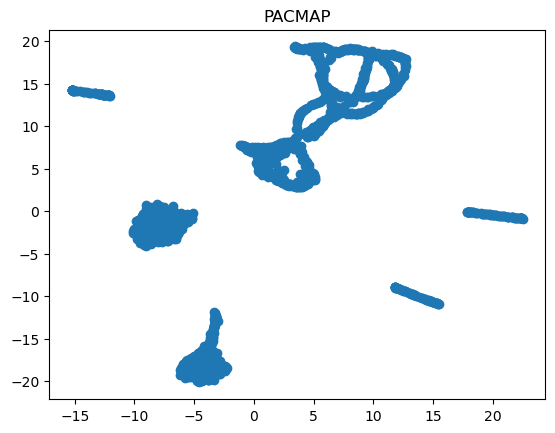

In [16]:
#using PACMAP
pacmap = pacmap.PaCMAP(n_components=2, n_neighbors=None, MN_ratio=0.5, FP_ratio=2.0)
df_pacmap = pacmap.fit_transform(df_scaled)
plt.scatter(df_pacmap[:,0], df_pacmap[:,1])
plt.title("PACMAP")
plt.show()

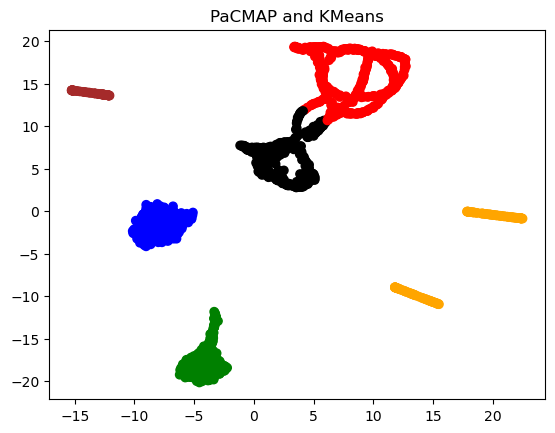

In [17]:
#PACMAP and KMEANS
pacmap_kmean_model = KMeans(n_clusters = 6)
pacmap_kmean_model.fit(df_pacmap)
pacmap_kmean_labels = pacmap_kmean_model.labels_
centroids = pacmap_kmean_model.cluster_centers_
    #print(pacmap_kmean_labels)
    # colors for plotting
pacmap_kmeans_colors = ['blue', 'red', 'green', 'orange', 'black', 'brown','teal','silver', 'yellow','purple','pink']
    # assign a color to each features (note that we are using features as target)
pacmap_kmeans_features_colors = [ pacmap_kmeans_colors[pacmap_kmean_labels[i]] for i in range(len(df_pacmap)) ]
plt.scatter(df_pacmap[:,0], df_pacmap[:,1],c=pacmap_kmeans_features_colors,marker='o')
plt.title("PaCMAP and KMeans")
plt.show()

[0 0 0 ... 5 5 5]


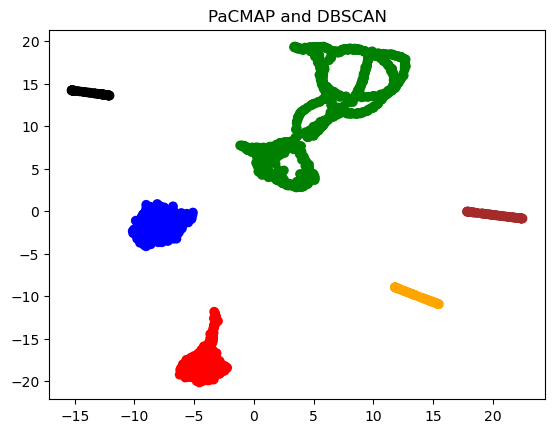

In [18]:
#PACMAP and DBSCAN
pacmap_dbscan_model = DBSCAN(eps = 4.54, min_samples = 4)
pacmap_dbscan_model.fit(df_pacmap)
pacmap_dbscan_labels = pacmap_dbscan_model.labels_
#centroids = pacmap_dbscan_model.cluster_centers_
print(pacmap_dbscan_labels)
    # colors for plotting
pacmap_dbscan_colors = ['blue', 'red', 'green', 'orange', 'black', 'brown','teal','silver', 'yellow','purple','pink']
    # assign a color to each features (note that we are using features as target)
pacmap_dbscan_features_colors = [ pacmap_dbscan_colors[pacmap_dbscan_labels[i]] for i in range(len(df_pacmap)) ]
plt.scatter(df_pacmap[:,0], df_pacmap[:,1],c=pacmap_dbscan_features_colors,marker='o')
plt.title("PaCMAP and DBSCAN")
plt.show()

Text(0.5, 1.0, 'PaCMAP and Birch')

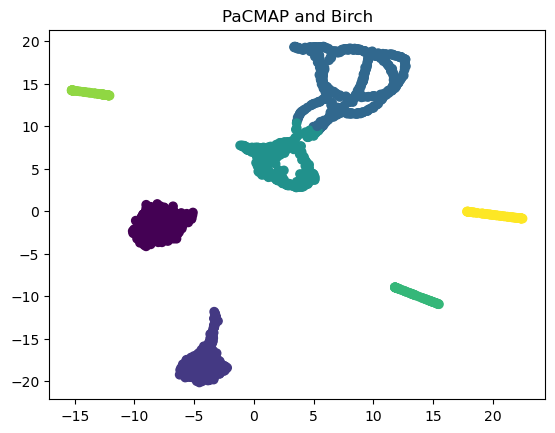

In [19]:
#PACMAP and Birch
pacmap_birch_model = Birch(branching_factor = 10, n_clusters = None, threshold = 5)
pacmap_birch_model.fit(df_pacmap)
pacmap_birch_labels = pacmap_birch_model.labels_
pacmap_birch_pred = pacmap_birch_model.predict(df_pacmap)
plt.scatter(df_pacmap[:, 0], df_pacmap[:, 1], c = pacmap_birch_pred)
plt.title("PaCMAP and Birch")

UMAP and Clustering 

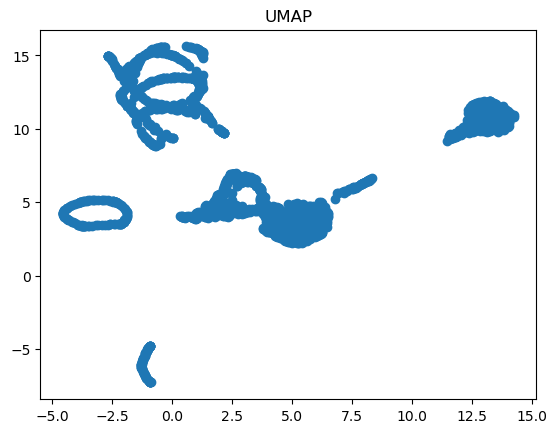

In [20]:
#using UMAP
umap = umap.UMAP()
df_umap = umap.fit_transform(df_scaled)

plt.scatter(df_umap[:,0], df_umap[:,1])
plt.title("UMAP")
plt.show()

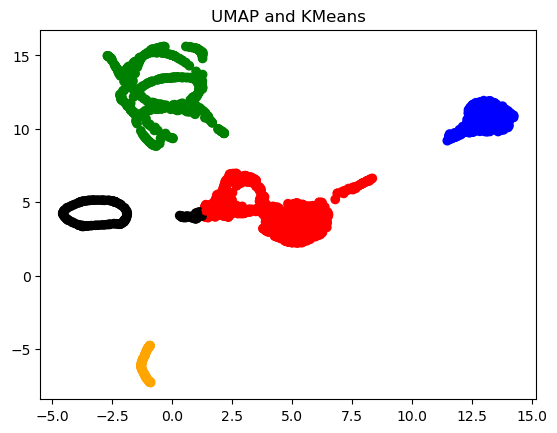

In [21]:
#UMAP and KMEANS
umap_kmean_model = KMeans(n_clusters = 5)
umap_kmean_model.fit(df_umap)
umap_kmean_labels = umap_kmean_model.labels_
#centroids = pacmap_kmean_model.cluster_centers_
#print(pacmap_kmean_labels)

# colors for plotting
umap_kmeans_colors = ['blue', 'red', 'green', 'orange', 'black', 'brown','teal','silver', 'yellow','purple','pink']
# assign a color to each features (note that we are using features as target)
umap_kmeans_features_colors = [ umap_kmeans_colors[umap_kmean_labels[i]] for i in range(len(df_umap)) ]

plt.scatter(df_umap[:,0], df_umap[:,1],c=umap_kmeans_features_colors,marker='o')
plt.title("UMAP and KMeans")
plt.show()

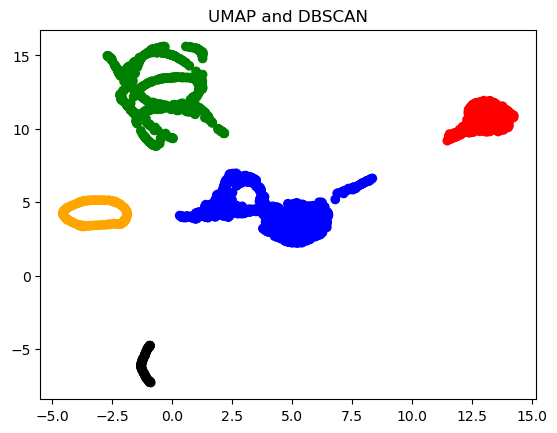

In [22]:
#UMAP and DBSCAN
umap_dbscan_model = DBSCAN(eps = 1, min_samples = 25)
umap_dbscan_model.fit(df_umap)
umap_dbscan_labels = umap_dbscan_model.labels_
#centroids = pacmap_dbscan_model.cluster_centers_
#print(umap_dbscan_labels)

# colors for plotting
umap_dbscan_colors = ['blue', 'red', 'green', 'orange', 'black', 'brown','teal','silver', 'yellow','purple','pink']
# assign a color to each features (note that we are using features as target)
umap_dbscan_features_colors = [ umap_dbscan_colors[umap_dbscan_labels[i]] for i in range(len(df_umap)) ]

plt.scatter(df_umap[:,0], df_umap[:,1],c=umap_dbscan_features_colors,marker='o')
plt.title("UMAP and DBSCAN")
plt.show()

Text(0.5, 1.0, 'UMAP and Birch')

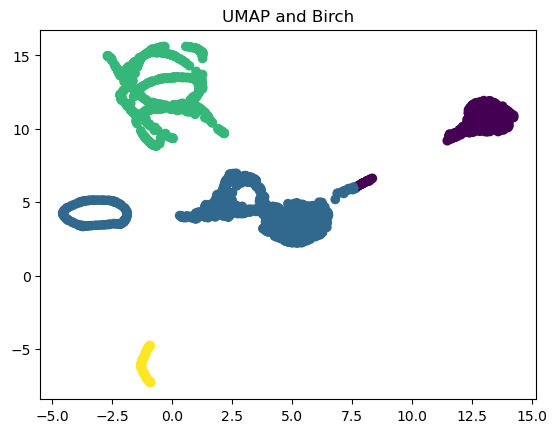

In [23]:
#UMAP and Birch
umap_birch_model = Birch(branching_factor = 20, n_clusters = None, threshold = 4)
umap_birch_model.fit(df_umap)
umap_birch_labels = umap_birch_model.labels_
umap_birch_pred = umap_birch_model.predict(df_umap)
plt.scatter(df_umap[:, 0], df_umap[:, 1], c = umap_birch_pred)
plt.title("UMAP and Birch")